# Student Performance Prediction

The task is to predict the G3 scores of students on the basis of given set of 33 features in the dataset.

The data is separated into two CSV files, one for Mathematics scores, one for Portugese score with a non-exclusive sets of students. Both the datasets are combined by vertical concatenation followed by removal of duplicates identified based on exact matching of characteristics. The newly formed dataset will be used as the training and the test data.

In [1412]:
! pip install xgboost

In [1413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [1414]:
import sklearn

### Loading and forming the dataset

In [1415]:
data1 = pd.read_csv("E:/Machine Learning Projects/Student Performance Prediction/Dataset/student/student-mat.csv",sep= ";")
data2 = pd.read_csv("E:/Machine Learning Projects/Student Performance Prediction/Dataset/student/student-por.csv",sep= ";")

In [1416]:
data1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [1417]:
data1.shape

(395, 33)

In [1418]:
data2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [1419]:
data2.shape

(649, 33)

In [1420]:
data1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [1421]:
data2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Since data1 and data2 have the same columns they can be exactly stacked vertically over each other to make a new dataset with both the subjects marks.

In [1422]:
data = pd.concat([data1,data2],axis =0,ignore_index=True)
data.shape

(1044, 33)

In [1423]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Dropping columsn G1 and G2 

The dataset contains three columns with the scores of students for their first, second and third periods namely G1, G2 and G3. The target will be to predict the G3 score for each student using the parameters given and attain maximum accuracy. Since G1 and G2 are the students' scores of first and second years, they are highly suggestive of a students' marks in their third years and hence, obstruct the assessment of marks through normally available features (in a general case).

In [1424]:
data.drop(["G1","G2"],axis = 1, inplace=True)

#### Checking for Null values

In [1425]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

#### Logical Screening of Attributes (columns)

In [1426]:
# Reading File with attributes description
f = open("E:/Machine Learning Projects/Student Performance Prediction/Dataset/student/student.txt","r")
while True:
    line = f.readline()
    if line == "":
        break
    print(line,end = " ")

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
 2 sex - student's sex (binary: "F" - female or "M" - male)
 3 age - student's age (numeric: from 15 to 22)
 4 address - student's home address type (binary: "U" - urban or "R" - rural)
 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or p

On preliminary screening of the features, all the features seem relevant to the determination of a student's marks.

Now, we will extract the target variable (G3) from the dataset and save it as y and save the existing dataset after dropping G3 as X.

In [1427]:
y = data["G3"]
X = data.drop("G3",axis = 1)

### Train-Test-Validation Split

Before further exploration of data, we will split the data into train and test data

In [1428]:
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size = 0.3)

In [1429]:
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size = 0.2)

In [1430]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [1431]:
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,584.000000,584.00000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,16.789384,2.60274,2.359589,1.551370,1.981164,0.265411,3.943493,3.188356,3.183219,1.525685,2.272260,3.527397,4.476027
std,1.239082,1.10963,1.107038,0.729739,0.833263,0.652034,0.949077,1.025641,1.151772,0.967406,1.308182,1.410304,6.663135
min,15.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.00000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.00000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.00000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,21.000000,4.00000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


Since all the numerical parameters have a maximum rating of 4 or 5 (other than age and absences), we do not to normalise the dataset

In [1432]:
X_train.nunique()

school         2
sex            2
age            7
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      29
dtype: int64

In [1433]:
categorical = [var for var in X_train.columns if X_train[var].dtype =="O"]
numerical = [var for var in X_train.columns if X_train[var].dtype != "O"]

In [1434]:
numerical

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [1435]:
categorical

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

### Evaluating the numerical variables

In [1436]:
num_train = X_train[numerical]
num_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,17,3,3,1,1,0,4,3,5,3,5,5,3
1,18,3,2,2,2,0,4,1,1,1,1,5,75
2,15,4,4,2,2,2,4,4,4,2,3,5,6
3,17,2,1,1,2,0,4,2,3,2,2,2,2
4,19,1,1,1,3,2,4,1,2,1,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,16,3,1,2,4,0,4,3,2,1,1,5,2
580,15,2,2,1,4,0,4,3,4,1,1,4,6
581,18,2,1,1,2,0,5,2,4,1,2,4,8
582,15,3,3,1,2,0,5,3,2,1,1,2,0


In [1437]:
cr_list = []
for var in numerical:
    cr = y_train.corr(X_train[var])
    cr_list.append(cr)
    print(f"{var}:  {cr}")

age:  -0.1555540255874388
Medu:  0.17526629742366973
Fedu:  0.17312548233295616
traveltime:  -0.08064656884099647
studytime:  0.18541197721616237
failures:  -0.3970271151262718
famrel:  0.05722924800793925
freetime:  -0.08254168764777885
goout:  -0.1397186293596834
Dalc:  -0.168217613748857
Walc:  -0.15970027387047636
health:  -0.09853687156293289
absences:  -0.04763686986764999


### Plotting the absolute values of correlations to find their importance

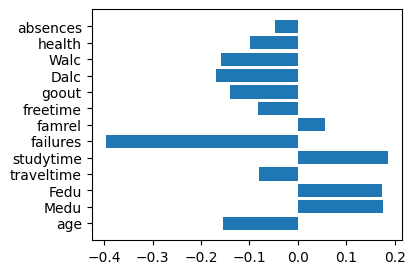

In [1438]:
plt.figure(figsize = (4,3))
plt.barh(numerical, cr_list)
plt.show()

#### Observations

- Health, age, family relations,absences, free time and travel time have almost negligible correlation with y.
- Study time, weekly alcohol, daily alcohol, going ou and father's education have a slighly hihger correlation.
- Mother's education and number of past failures has a considerable correlation.

### Removing unrelated numerical variables

In [1439]:
X_train.drop(["health","age","famrel","absences","freetime","traveltime"],axis = 1, inplace = True)

### Evaluating categorical variables

In [1440]:
for var in categorical:
    print(X_train[var].value_counts()/len(X_train))
    print("--------------------------------------")

school
GP    0.72774
MS    0.27226
Name: count, dtype: float64
--------------------------------------
sex
F    0.546233
M    0.453767
Name: count, dtype: float64
--------------------------------------
address
U    0.700342
R    0.299658
Name: count, dtype: float64
--------------------------------------
famsize
GT3    0.708904
LE3    0.291096
Name: count, dtype: float64
--------------------------------------
Pstatus
T    0.890411
A    0.109589
Name: count, dtype: float64
--------------------------------------
Mjob
other       0.404110
services    0.231164
at_home     0.169521
teacher     0.121575
health      0.073630
Name: count, dtype: float64
--------------------------------------
Fjob
other       0.573630
services    0.265411
teacher     0.061644
at_home     0.054795
health      0.044521
Name: count, dtype: float64
--------------------------------------
reason
course        0.393836
reputation    0.273973
home          0.229452
other         0.102740
Name: count, dtype: float64
-----

In [1441]:
def categorical_analysis(ctg_var):
    '''
    Determines the differences in students' perfromnace
    based on different categories of a categorical variable

    Arguement: Categorical Variable

    Output: Mean of students' marks for different categories
    and a bar plot representing the means
    '''
    ctg_analysis = pd.DataFrame()
    ctg_analysis["Index"] = np.arange(731)
    total_ctgs = X_train[ctg_var].unique()
    for ctg in range(len(total_ctgs)):
        one_ctg = total_ctgs[ctg]
        req_indices = X_train.index[X_train[ctg_var]== one_ctg].tolist()
        ctg_analysis[one_ctg] = y_train.iloc[req_indices]
    performance = ctg_analysis.mean()
    performance.drop("Index",inplace = True)

    plt.figure(figsize = (4,3))
    plt.bar(total_ctgs,performance, width = 0.5) 
    plt.xlabel("Categories")
    plt.ylabel("Marks out of 20")
    plt.title(f"Effect of {ctg_var} on student performance")
    plt.show()

    return performance
        

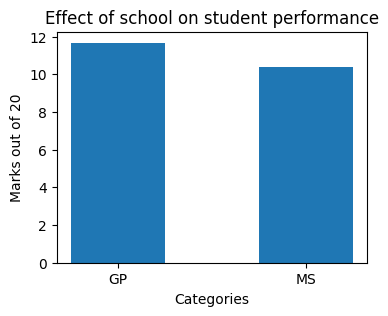

GP    11.670588
MS    10.364780
dtype: float64
-------------------------------------------------------


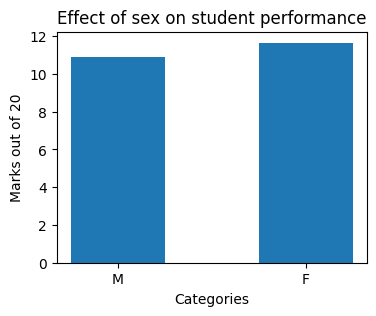

M    10.905660
F    11.655172
dtype: float64
-------------------------------------------------------


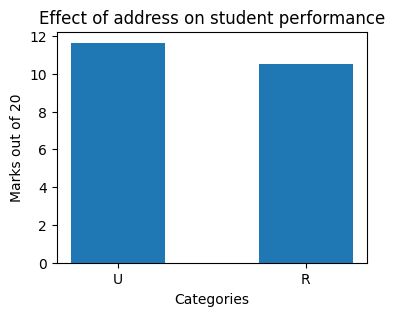

U    11.645477
R    10.542857
dtype: float64
-------------------------------------------------------


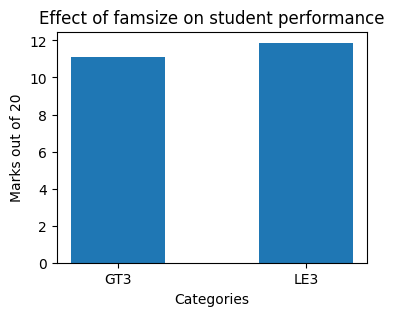

GT3    11.084541
LE3    11.876471
dtype: float64
-------------------------------------------------------


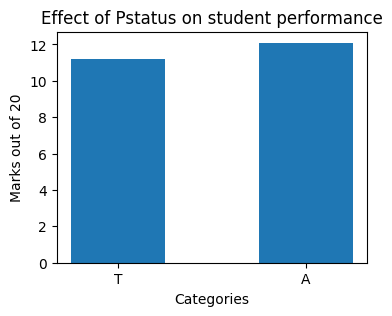

T    11.219231
A    12.093750
dtype: float64
-------------------------------------------------------


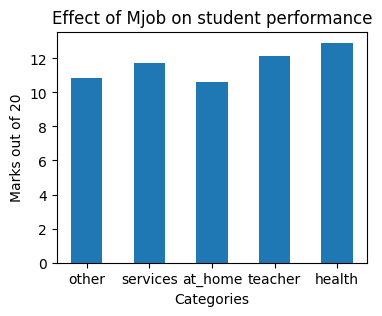

other       10.834746
services    11.718519
at_home     10.595960
teacher     12.169014
health      12.930233
dtype: float64
-------------------------------------------------------


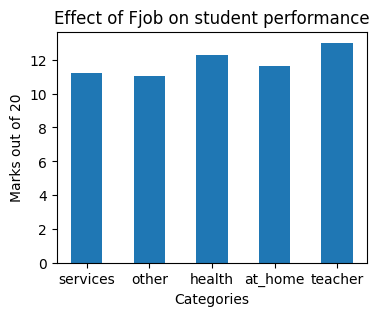

services    11.238710
other       11.059701
health      12.307692
at_home     11.625000
teacher     13.027778
dtype: float64
-------------------------------------------------------


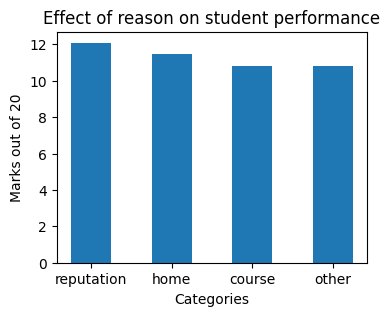

reputation    12.087500
home          11.470149
course        10.817391
other         10.816667
dtype: float64
-------------------------------------------------------


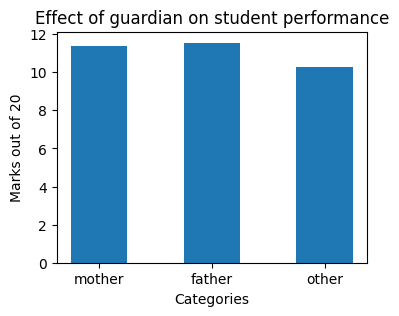

mother    11.352078
father    11.549618
other     10.272727
dtype: float64
-------------------------------------------------------


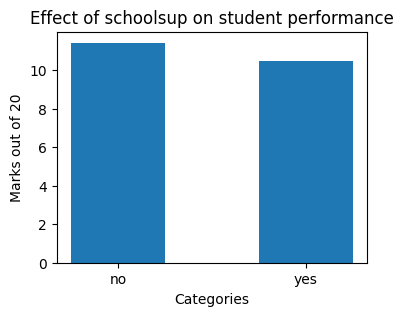

no     11.425532
yes    10.462687
dtype: float64
-------------------------------------------------------


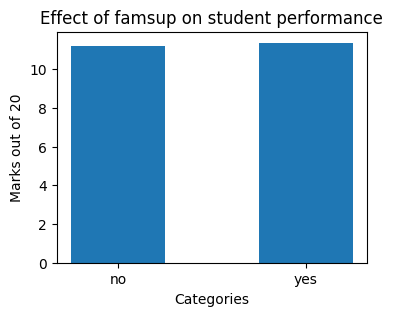

no     11.217778
yes    11.376045
dtype: float64
-------------------------------------------------------


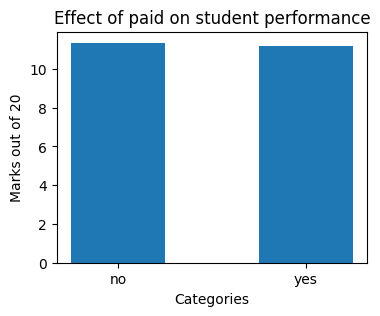

no     11.351648
yes    11.186047
dtype: float64
-------------------------------------------------------


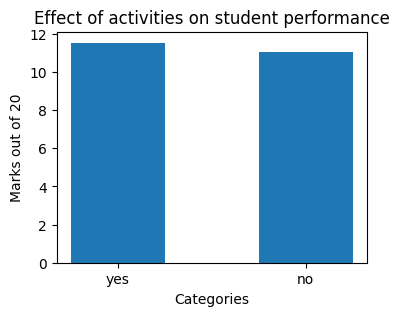

yes    11.532051
no     11.066176
dtype: float64
-------------------------------------------------------


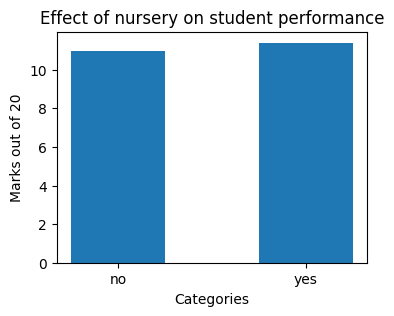

no     10.983333
yes    11.400862
dtype: float64
-------------------------------------------------------


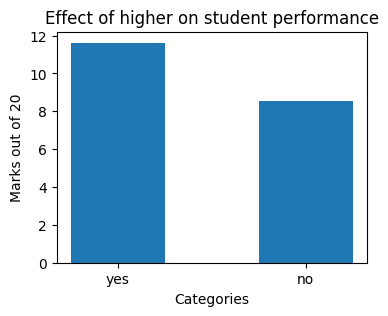

yes    11.619772
no      8.551724
dtype: float64
-------------------------------------------------------


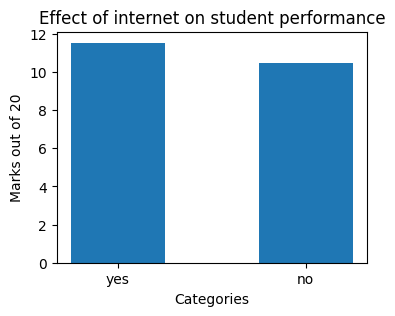

yes    11.538793
no     10.450000
dtype: float64
-------------------------------------------------------


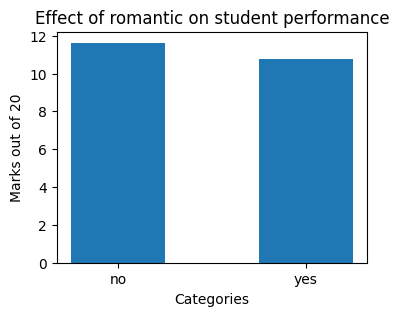

no     11.627027
yes    10.775701
dtype: float64
-------------------------------------------------------


In [1442]:
for cat in categorical:
    print(categorical_analysis(cat))
    print("-------------------------------------------------------")

#### Observation

- There is a significant difference in the mean of student marks on the basis of MJob, FJob, Gaurdian, reason for joining and higher education plans.
- There is a moderate difference in student performance on the basis of school, address, school support, internet and romantic relationship.
- Unnoticeable difference in students' performance on the basis of their sex, family size, Parent living status, family support, paid tuition, extra activities and attending nursery.


Out of categorical variables, the unnoticeable difference variables can be removed, while the significant ones will have to be retained. The inclusion of moderate importance features can be evaluated by testing the model trained by both methods on th Cross validation set.

#### Removing unrelated categorical variables

In [1443]:
X_train.drop(["sex","famsize","Pstatus","famsup","paid","activities"], axis = 1,inplace = True)

In [1444]:
final_cols = X_train.columns
final_cols

Index(['school', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'studytime', 'failures', 'schoolsup', 'nursery', 'higher',
       'internet', 'romantic', 'goout', 'Dalc', 'Walc'],
      dtype='object')

In [1445]:
# X_train = pd.get_dummies(X_train)

In [1446]:
X_train.head()
X_train.columns

Index(['school', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'studytime', 'failures', 'schoolsup', 'nursery', 'higher',
       'internet', 'romantic', 'goout', 'Dalc', 'Walc'],
      dtype='object')

### Training a model on the given data

For model training, we will be using two datasets: 
1. Dataset with shortlisted features without additional features
2. Dataset with shortlisted features combined to make 2nd degree polynomial features

The models trained will be assessed for their performance on the basis of mean absolute error and root mean squared error.
The following types of models will be implemented on both the versions of the dataset:
- Linear Regression
- XGBoost Regression
- Ridge Regression
- Lasso Regression

### Training the models on Existing Features Dataset
This Dataset consists of the shortlisted features in their exisitng form without creation of new features by combining any features

In [1447]:
# Preprocessing Function for the Datasets 

def normal_preprocess(X,y):
    X_pre = X[final_cols]
    X_pre_1 = pd.get_dummies(X_pre)
    X_final = np.array(X_pre_1)
    y_pre = np.array(y)

    return X_final,y_pre

In [1448]:
# # Evaluation Function for the Models

# def evaluate_model(y_train, y_val, pred_train, pred_val):
#     mae_train = mean_absolute_error(y_train,pred_train)
#     mse_train = mean_squared_error(y_train,pred_train)
#     mae_val = mean_absolute_error(y_val,pred_val)
#     mse_val = mean_squared_error(y_val,pred_val)

#     return mae_train, mse_train, mae_val, mse_val

In [1449]:
def evaluate_model_normal(model,X_train,y_tain,X_test,y_test):
    '''
    Takes the model, train set and test set as the arguement
    and returns the evaluation score for the model
    '''
    X_arr, y_arr = normal_preprocess(X_train, y_train)               #Preprocessing 
    X_test_pre, y_test_pre = normal_preprocess(X_test, y_test)       #Preprocessing
    model.fit(X_arr,y_arr)                                           #Fitting
    train_preds = model.predict(X_arr)                               #Train prediction
    test_preds = model.predict(X_test_pre)                           #Test prediction
    
    # Evaluating model
    mae_train = mean_absolute_error(y_arr,train_preds)
    mse_train = mean_squared_error(y_arr,train_preds)
    mae_val = mean_absolute_error(y_val,test_preds)
    mse_val = mean_squared_error(y_val,test_preds)

    return mae_train, mse_train, mae_val, mse_val


In [1450]:
mae_all = []
mse_all = []

#### Model 1: Linear Regression Model

In [1451]:
lr_model = LinearRegression()

lr_mae_train, lr_mse_train, lr_mae_val, lr_mse_val = evaluate_model_normal(lr_model, X_train, y_train, X_val, y_val)

mae_all.append(lr_mae_val)
mse_all.append(lr_mse_val)

print(f"The Mean Absolute Error on Training Data is: {lr_mae_train}")
print(f"The Mean Squared Error on Training Data is: {lr_mse_train}")
print(f"The Mean Absolute Error on Validation Data is: {lr_mae_val}")
print(f"The Mean Squared Error on Validation Data is: {lr_mse_val}")

The Mean Absolute Error on Training Data is: 2.341041042380137
The Mean Squared Error on Training Data is: 10.557141630616906
The Mean Absolute Error on Validation Data is: 2.715485873287671
The Mean Squared Error on Validation Data is: 13.845205437647154


#### Model 2: XGBRegressor

In [1452]:
xgbr_model = xgb.XGBRegressor()

xgb_mae_train, xgb_mse_train, xgb_mae_val, xgb_mse_val = evaluate_model_normal(xgbr_model, X_train, y_train, X_val, y_val)

mae_all.append(xgb_mae_val)
mse_all.append(xgb_mse_val)

print(f"The Mean Absolute Error on Training Data is: {xgb_mae_train}")
print(f"The Mean Squared Error on Training Data is: {xgb_mse_train}")
print(f"The Mean Absolute Error on Validation Data is: {xgb_mae_val}")
print(f"The Mean Squared Error on Validation Data is: {xgb_mse_val}")

The Mean Absolute Error on Training Data is: 0.5472921747805978
The Mean Squared Error on Training Data is: 1.2412036946448923
The Mean Absolute Error on Validation Data is: 2.9194839617671215
The Mean Squared Error on Validation Data is: 16.165744416528497


#### Model 2a: XGBRegressor with Early Stopping

Since the XGBRegressor is overfitting the data, we can use early stopping to fit a model for better general performance.

In [1453]:
xgbr_model_2 = xgb.XGBRegressor()

X_arr, y_arr = normal_preprocess(X_train, y_train)  
X_v, y_v = normal_preprocess(X_val, y_val)    


In [1454]:
eval_set = [(X_v,y_v)]

xgbr_model_2.fit(X_arr, y_arr , eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 5)

[0]	validation_0-rmse:8.13682
[1]	validation_0-rmse:6.19099
[2]	validation_0-rmse:4.99983
[3]	validation_0-rmse:4.25800
[4]	validation_0-rmse:3.85497
[5]	validation_0-rmse:3.71796
[6]	validation_0-rmse:3.67125
[7]	validation_0-rmse:3.64490
[8]	validation_0-rmse:3.62588
[9]	validation_0-rmse:3.66316
[10]	validation_0-rmse:3.68489
[11]	validation_0-rmse:3.70849
[12]	validation_0-rmse:3.76990


c:\New folder\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\New folder\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1455]:
xgbr_2_train_preds = xgbr_model_2.predict(X_arr)                              
xgbr_2_test_preds = xgbr_model_2.predict(X_v)   

In [1456]:
mae_2a_train = mean_absolute_error(y_arr, xgbr_2_train_preds)
mse_2a_train = mean_squared_error(y_arr, xgbr_2_train_preds)
mae_2a = mean_absolute_error(y_v, xgbr_2_test_preds)
mse_2a = mean_squared_error(y_v, xgbr_2_test_preds)

mae_all.append(mae_2a)
mse_all.append(mse_2a)


In [1457]:
print(f"The Mean Absolute Error on Training Data is: {mae_2a_train}")
print(f"The Mean Squared Error on Training Data is: {mse_2a_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_2a}")
print(f"The Mean Squared Error on Validation Data is: {mse_2a}")

The Mean Absolute Error on Training Data is: 1.6814139012808669
The Mean Squared Error on Training Data is: 5.030641795580628
The Mean Absolute Error on Validation Data is: 2.6813771545070493
The Mean Squared Error on Validation Data is: 13.147011912419927


#### Model 3: Ridge Regressor

In [1458]:
ridge = Ridge()

X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

X_full = np.vstack([X_arr,X_v])
y_full = np.hstack([y_arr, y_v])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

ridge_regressor=GridSearchCV(ridge,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X_full,y_full)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-12.157863339597215


Hence, we choose the parameter alpha as 100 and use Ridge Regression

In [1459]:
X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

In [1460]:
ridge = Ridge(alpha = 100)
ridge.fit(X_arr,y_arr)

Ridge(alpha=100)

In [1461]:
ridge_train_preds = ridge.predict(X_arr)                              
ridge_val_preds = ridge.predict(X_v)   

In [1462]:
mae_3_train = mean_absolute_error(y_arr, ridge_train_preds)
mse_3_train = mean_squared_error(y_arr, ridge_train_preds)
mae_3 = mean_absolute_error(y_v, ridge_val_preds)
mse_3 = mean_squared_error(y_v, ridge_val_preds)

mae_all.append(mae_3)
mse_all.append(mse_3)

In [1463]:
print(f"The Mean Absolute Error on Training Data is: {mae_3_train}")
print(f"The Mean Squared Error on Training Data is: {mse_3_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_3}")
print(f"The Mean Squared Error on Validation Data is: {mse_3}")

The Mean Absolute Error on Training Data is: 2.349884371811722
The Mean Squared Error on Training Data is: 10.898509405912986
The Mean Absolute Error on Validation Data is: 2.6558126622687577
The Mean Squared Error on Validation Data is: 13.574636190537117


#### Model 4: Lasso Regressor

In [1464]:
lasso = Lasso()

X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

X_full = np.vstack([X_arr,X_v])
y_full = np.hstack([y_arr, y_v])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

lasso_regressor=GridSearchCV(lasso,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_full,y_full)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-12.251854905614662


Hence, we choose the alpha = 0.01 for Lasso Regressor 

In [1465]:
X_arr,y_arr = normal_preprocess(X_train,y_train)
X_v,y_v = normal_preprocess(X_val,y_val)

In [1466]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_arr,y_arr)

Lasso(alpha=0.01)

In [1467]:
lasso_train_preds = lasso.predict(X_arr)                              
lasso_val_preds = lasso.predict(X_v)   

In [1468]:
mae_4_train = mean_absolute_error(y_arr, lasso_train_preds)
mse_4_train = mean_squared_error(y_arr, lasso_train_preds)
mae_4 = mean_absolute_error(y_v, lasso_val_preds)
mse_4 = mean_squared_error(y_v, lasso_val_preds)

mae_all.append(mae_4)
mse_all.append(mse_4)

In [1469]:
print(f"The Mean Absolute Error on Training Data is: {mae_4_train}")
print(f"The Mean Squared Error on Training Data is: {mse_4_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_4}")
print(f"The Mean Squared Error on Validation Data is: {mse_4}")

The Mean Absolute Error on Training Data is: 2.3379770906505937
The Mean Squared Error on Training Data is: 10.575007272829232
The Mean Absolute Error on Validation Data is: 2.683084139250103
The Mean Squared Error on Validation Data is: 13.557671270705894


#### Training Model on Polynomial Features
The features from the dataset are combined together to form polynomial features of degree 2 to fit a better model for marks prediction.

In [1470]:
polyfit = PolynomialFeatures(2)

In [1471]:
def poly_preprocess(X,y):
    X_pre = X[final_cols]
    X_pre_1 = pd.get_dummies(X_pre)
    X_final = np.array(X_pre_1)
    X_poly = polyfit.fit_transform(X_final)
    y_pre = np.array(y)

    return X_poly,y_pre

In [1472]:
X_arr_poly, y_arr_poly = poly_preprocess(X_train, y_train)

In [1473]:
X_arr_poly.shape

(584, 780)

We see that with the various combinations of the existing features of degree 2, the total number of features is 780, which is more than the number of training examples. Hence, Linear Regressor and XGBRegressor will not be suitable in this case

Hence, we will be fitting only Ridge Regressor and Lasso Regressor to this dataset.

#### Model 5: Ridge Regressor on Poly Features

In [1474]:
ridge_poly = Ridge()

X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

X_full_poly = np.vstack([X_arr_poly,X_v_poly])
y_full_poly = np.hstack([y_arr_poly, y_v_poly])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

ridge_regressor_poly=GridSearchCV(ridge_poly,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

ridge_regressor_poly.fit(X_full_poly,y_full_poly)
print(ridge_regressor_poly.best_params_)
print(ridge_regressor_poly.best_score_)

{'alpha': 100}
-11.965625344954697


Hence, we will be using the Ridge Regressor with alpha = 100

In [1475]:
X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

In [1476]:
ridge_poly = Ridge(alpha = 100)
ridge_poly.fit(X_arr_poly,y_arr_poly)

Ridge(alpha=100)

In [1477]:
ridge_poly_train_preds = ridge_poly.predict(X_arr_poly)                              
ridge_poly_val_preds = ridge_poly.predict(X_v_poly)   

In [1478]:
mae_5_train = mean_absolute_error(y_arr_poly, ridge_poly_train_preds)
mse_5_train = mean_squared_error(y_arr_poly, ridge_poly_train_preds)
mae_5 = mean_absolute_error(y_v_poly, ridge_poly_val_preds)
mse_5 = mean_squared_error(y_v_poly, ridge_poly_val_preds)

mae_all.append(mae_5)
mse_all.append(mse_5)

In [1479]:
print(f"The Mean Absolute Error on Training Data is: {mae_5_train}")
print(f"The Mean Squared Error on Training Data is: {mse_5_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_5}")
print(f"The Mean Squared Error on Validation Data is: {mse_5}")

The Mean Absolute Error on Training Data is: 1.9670050754530952
The Mean Squared Error on Training Data is: 7.1114209432888345
The Mean Absolute Error on Validation Data is: 2.7057844713942423
The Mean Squared Error on Validation Data is: 13.763558409991933


#### Model 6: Lasso Regressor on Poly Features

In [1480]:
lasso_poly = Lasso()

X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

X_full_poly = np.vstack([X_arr_poly,X_v_poly])
y_full_poly = np.hstack([y_arr_poly, y_v_poly])

param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10,100]}

lasso_regressor_poly=GridSearchCV(lasso_poly,param_grid = param_grid,scoring='neg_mean_squared_error',cv=5)

lasso_regressor_poly.fit(X_full_poly,y_full_poly)
print(lasso_regressor_poly.best_params_)
print(lasso_regressor_poly.best_score_)

c:\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+03, tolerance: 8.429e-01
  model = cd_fast.enet_coordinate_descent(
c:\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+03, tolerance: 8.965e-01
  model = cd_fast.enet_coordinate_descent(
c:\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+03, tolerance: 8.888e-01
  model = cd_fast.en

{'alpha': 0.1}
-11.794840097382096


Hence, we will be using the Lasso Regressor with alpha = 0.1

In [1481]:
X_arr_poly,y_arr_poly = poly_preprocess(X_train,y_train)
X_v_poly,y_v_poly = poly_preprocess(X_val,y_val)

In [1482]:
lasso_poly = Lasso(alpha = 0.1)
lasso_poly.fit(X_arr_poly,y_arr_poly)

Lasso(alpha=0.1)

In [1483]:
lasso_poly_train_preds = lasso_poly.predict(X_arr_poly)                              
lasso_poly_val_preds = lasso_poly.predict(X_v_poly)

In [1484]:
mae_6_train = mean_absolute_error(y_arr_poly, lasso_poly_train_preds)
mse_6_train = mean_squared_error(y_arr_poly, lasso_poly_train_preds)
mae_6 = mean_absolute_error(y_v_poly, lasso_poly_val_preds)
mse_6 = mean_squared_error(y_v_poly, lasso_poly_val_preds)

mae_all.append(mae_6)
mse_all.append(mse_6)

In [1485]:
print(f"The Mean Absolute Error on Training Data is: {mae_6_train}")
print(f"The Mean Squared Error on Training Data is: {mse_6_train}")
print(f"The Mean Absolute Error on Validation Data is: {mae_6}")
print(f"The Mean Squared Error on Validation Data is: {mse_6}")

The Mean Absolute Error on Training Data is: 2.222339664872305
The Mean Squared Error on Training Data is: 9.618746824745907
The Mean Absolute Error on Validation Data is: 2.564749403431849
The Mean Squared Error on Validation Data is: 12.597726308942963


## Summary Table of all Models

In [1490]:
model_names = ["Linear Regressor","XGBRegressor", "XGBRegressor Modified","Ridge Regressor","Lasso Regressor","Ridge Regressor Poly", "Lasso Regeressor Poly"]
summary_df = pd.DataFrame(columns = ["MAE","MSE"], index = my_models)

model_mae_mse = zip(model_names,mae_all, mse_all)

for model,mae,mse in model_mae_mse:
    summary_df.loc[model] = mae, mse

In [1491]:
summary_df = summary_df.astype(float).round(4)
summary_df

,MAE,MSE
Linear Regressor,2.7155,13.8452
XGBRegressor,2.9195,16.1657
XGBRegressor Modified,2.6814,13.1470
Ridge Regressor,2.6558,13.5746
Lasso Regressor,2.6831,13.5577
Ridge Regressor Poly,2.7058,13.7636
Lasso Regeressor Poly,2.5647,12.5977


Lasso Regressor on polynomial features has the lowest mean absolute error and mean squared error on validation data and hence, this is the best fit model to the training data for predicting student performance.

## Final Testing of the model on Test Data

### Training the Final Model
The final model will be a Lasso Regressor with alpha = 0.1 trained on the full train data including the validation data, and with additional polynomial featurs of degree 2.

In [1495]:
# Combining the Training and Validation Data

X_train_arr,y_train_arr = poly_preprocess(X_train,y_train)
X_v_arr,y_v_arr = poly_preprocess(X_val,y_val)

X_full_train = np.vstack([X_train_arr,X_v_arr])
y_full_train = np.hstack([y_train_arr, y_v_arr])

In [1496]:
final_model = Lasso(alpha = 0.1)

final_model.fit(X_full_train, y_full_train)

Lasso(alpha=0.1)

In [1498]:
X_test_arr,y_test_arr = poly_preprocess(X_test,y_test)

In [1499]:
X_train.index(X_train["higher"]== "yes").tolist()

TypeError: 'RangeIndex' object is not callable

In [1497]:


test_preds = final_model.predict(X_test)

c:\New folder\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'GP'

In [1494]:
X_test.shape, y_test.shape

((314, 30), (314,))

How to deal with categorical data
Citation